# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

/home/admin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:19<00:00, 8525897.86it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.300
[epoch: 0, i:  1499] avg mini-batch loss: 2.297
[epoch: 0, i:  1999] avg mini-batch loss: 2.285
[epoch: 0, i:  2499] avg mini-batch loss: 2.257
[epoch: 0, i:  2999] avg mini-batch loss: 2.209
[epoch: 0, i:  3499] avg mini-batch loss: 2.137
[epoch: 0, i:  3999] avg mini-batch loss: 2.049
[epoch: 0, i:  4499] avg mini-batch loss: 1.970
[epoch: 0, i:  4999] avg mini-batch loss: 1.903
[epoch: 1, i:   499] avg mini-batch loss: 1.869
[epoch: 1, i:   999] avg mini-batch loss: 1.839
[epoch: 1, i:  1499] avg mini-batch loss: 1.800
[epoch: 1, i:  1999] avg mini-batch loss: 1.798
[epoch: 1, i:  2499] avg mini-batch loss: 1.760
[epoch: 1, i:  2999] avg mini-batch loss: 1.744
[epoch: 1, i:  3499] avg mini-batch loss: 1.727
[epoch: 1, i:  3999] avg mini-batch loss: 1.661
[epoch: 1, i:  4499] avg mini-batch loss: 1.598
[epoch: 1, i:  4999] 

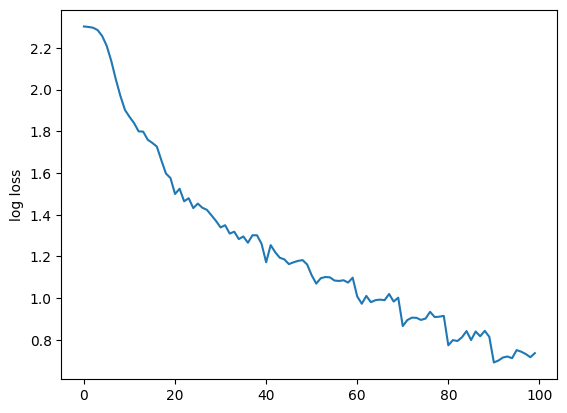

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 65.01 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.021314
Train Epoch: 2 	Loss: 0.011628
Train Epoch: 3 	Loss: 0.007052
Train Epoch: 4 	Loss: 0.004676
Train Epoch: 5 	Loss: 0.003471
Train Epoch: 6 	Loss: 0.002786
Train Epoch: 7 	Loss: 0.002344
Train Epoch: 8 	Loss: 0.002047
Train Epoch: 9 	Loss: 0.001857
Train Epoch: 10 	Loss: 0.001739
Train Epoch: 11 	Loss: 0.001623
Train Epoch: 12 	Loss: 0.001527
Train Epoch: 13 	Loss: 0.001457
Train Epoch: 14 	Loss: 0.001390
Train Epoch: 15 	Loss: 0.001328
Train Epoch: 16 	Loss: 0.001289
Train Epoch: 17 	Loss: 0.001231
Train Epoch: 18 	Loss: 0.001215
Train Epoch: 19 	Loss: 0.001177
Train Epoch: 20 	Loss: 0.001136


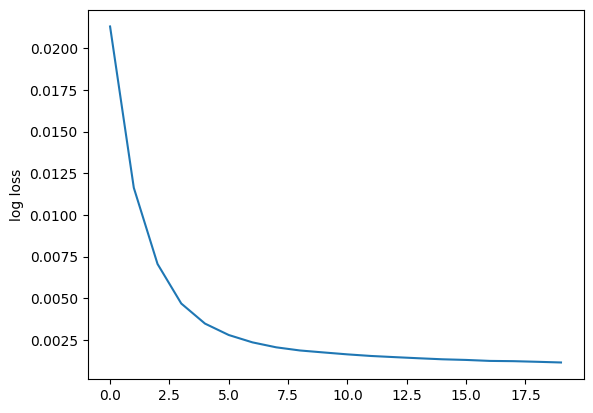

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:45<00:00, 94.46it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


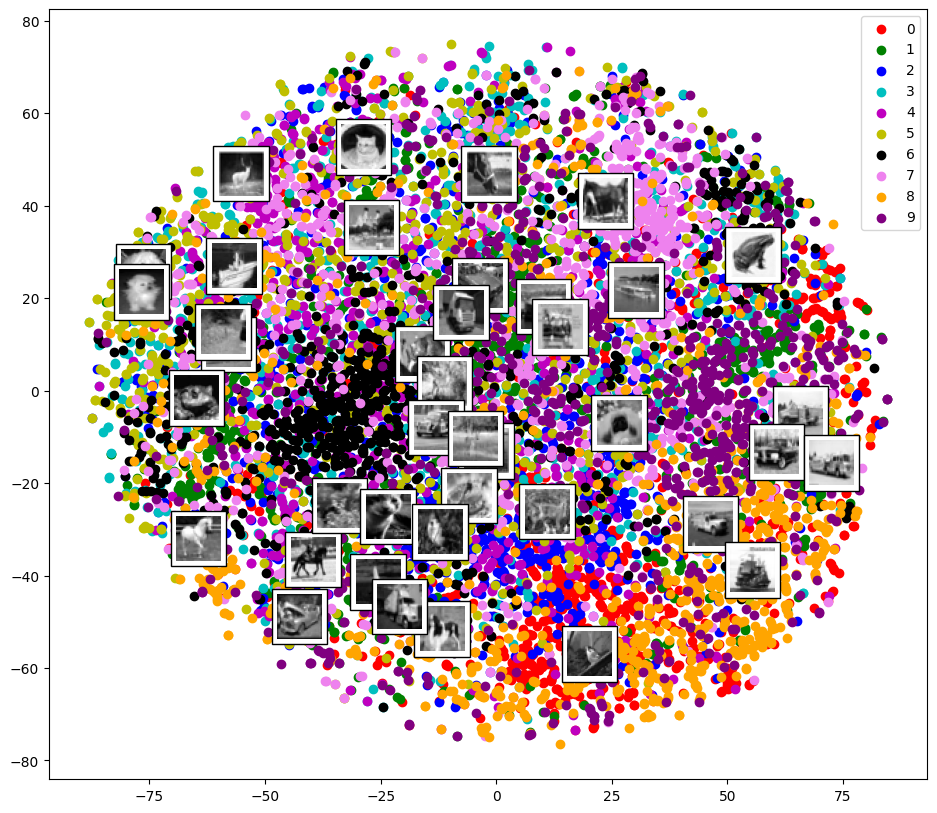

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:40<00:00, 96.11it/s] 


Files already downloaded and verified


100%|██████████| 10000/10000 [01:38<00:00, 101.41it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.6306

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:52<00:00, 95.65it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 94.54it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.294
[epoch: 2, i:   499] avg mini-batch loss: 2.267
[epoch: 3, i:   499] avg mini-batch loss: 2.215
[epoch: 4, i:   499] avg mini-batch loss: 2.142
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.296
[epoch: 2, i:   499] avg mini-batch loss: 2.280
[epoch: 3, i:   499] avg mini-batch loss: 2.213
[epoch: 4, i:   499] avg mini-batch loss: 2.125
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.295
[epoch: 2, i:   499] avg mini-batch loss: 2.273
[epoch: 3, i:   499] avg mini-batch loss: 2.210
[epoch: 4, i:   499] avg mini-batch loss: 2.135
Files already downloaded and verified


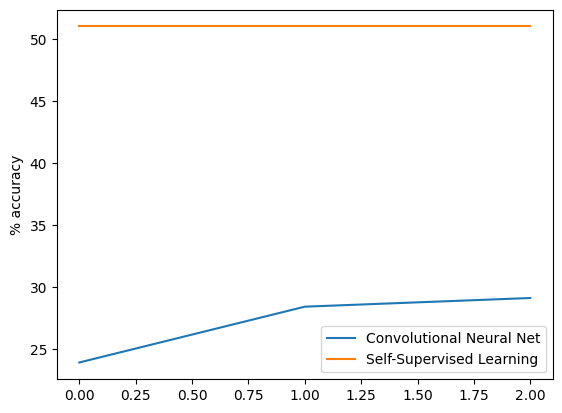

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[23.9, 28.4, 29.099999999999998]

In [21]:
svm_errors

[0.51, 0.51, 0.51]

In [22]:
conv_errors

[23.9, 28.4, 29.099999999999998]